In [1]:
%config Completer.use_jedi = False

# Biggest natural disasters in this century

Data source: https://public.emdat.be/data

### Data import

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 150

import seaborn as sns
sns.set_style("whitegrid")

In [3]:
disasters = pd.read_csv("datasets/emdat_public_2021_11_06.csv",sep="\t")
print(f"Index unique: {disasters.index.is_unique}")
print(f"Dataframe has dupliates: {sum(disasters.duplicated()) > 0}, n={sum(disasters.duplicated())}")
disasters.head()

Index unique: True
Dataframe has dupliates: False, n=0


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,2010-0017-HTI,2010,17,EQ-210-000009,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,3700000.0,11500000.0,200000.0,8000000.0,84.252733,2,NaN,17168;17177;17194;17197;17198;17201;17203,"Cayes, Croix-Des-Bouquets, Gonaives, Jacmel, J..."
1,2004-0659-IDN,2004,659,NaN,Natural,Geophysical,Earthquake,Tsunami,NaN,NaN,...,532898.0,532898.0,NaN,225000.0,4451600.0,72.981129,1,1512;1537,NaN,"Nangroe Aceh Darussalam, Sumatera Utara (Adm1)."
2,2008-0184-MMR,2008,184,TC-2008-000057,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone Nargis,...,NaN,2420000.0,NaN,NaN,4000000.0,83.189023,1;2,2128;2129;2132;41772;41773,41779;41780;41781;41839,"Bago (E), Bago (W), Kayar, Kayin, Mon (Adm1). ..."
3,2008-0192-CHN,2008,192,EQ-2008-000062,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,45976596.0,NaN,300000.0,85000000.0,83.189023,1;2,900;902;905;909;911;912;920;923;929,13255;13259;13260;13270,"Chongqing Shi, Gansu Sheng, Guizhou Sheng, Hen..."
4,2005-0575-PAK,2005,575,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,5000000.0,5128309.0,5200000.0,NaN,5200000.0,75.457200,2,NaN,23638;23674;40329;40331;40340;40344;40348;4036...,"Abbottabad District, Batagram District, Gujran..."


### Drop unneccessary columns

In [4]:
# disasters["Name"] = disasters.
disasters = disasters.drop(
    ["Seq", "Glide",
     "Disaster Group", "Disaster Subgroup", "Disaster Subsubtype",
     "Associated Dis", "Associated Dis2", 
     "Region", "Location", "River Basin", "Adm Level", "Admin1 Code", "Admin2 Code", "Geo Locations",
     "CPI", "Origin" ], axis=1)
disasters.loc[20]

Dis No                              2013-0192-IND
Year                                         2013
Disaster Type                               Flood
Disaster Subtype                   Riverine flood
Event Name                                    NaN
Country                                     India
ISO                                           IND
Continent                                    Asia
OFDA Response                                 Yes
Appeal                                        NaN
Declaration                                   NaN
Aid Contribution                              NaN
Dis Mag Value                            131743.0
Dis Mag Scale                                 Km2
Latitude                                   32.714
Longitude                                   76.61
Local Time                                    NaN
Start Year                                   2013
Start Month                                   6.0
Start Day                                    12.0


In [5]:
print(disasters.keys())
disasters[["Country", "Disaster Type", "Disaster Subtype", "Year", "OFDA Response", "Dis Mag Value", "Dis Mag Scale", "Total Deaths"]].head(10)

Index(['Dis No', 'Year', 'Disaster Type', 'Disaster Subtype', 'Event Name',
       'Country', 'ISO', 'Continent', 'OFDA Response', 'Appeal', 'Declaration',
       'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude',
       'Longitude', 'Local Time', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Reconstruction Costs ('000 US$)', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)'],
      dtype='object')


,Country,Disaster Type,Disaster Subtype,Year,OFDA Response,Dis Mag Value,Dis Mag Scale,Total Deaths
0,Haiti,Earthquake,Ground movement,2010,Yes,7.0,Richter,222570.0
1,Indonesia,Earthquake,Tsunami,2004,NaN,9.0,Richter,165708.0
2,Myanmar,Storm,Tropical cyclone,2008,Yes,215.0,Kph,138366.0
3,China,Earthquake,Ground movement,2008,Yes,8.0,Richter,87476.0
4,Pakistan,Earthquake,Ground movement,2005,Yes,8.0,Richter,73338.0
5,Russian Federation (the),Extreme temperature,Heat wave,2010,NaN,40.0,°C,55736.0
6,Sri Lanka,Earthquake,Tsunami,2004,Yes,9.0,Richter,35399.0
7,Iran (Islamic Republic of),Earthquake,Ground movement,2003,Yes,7.0,Richter,26796.0
8,Italy,Extreme temperature,Heat wave,2003,NaN,NaN,°C,20089.0
9,India,Earthquake,Ground movement,2001,Yes,8.0,Richter,20005.0


For raw data preprocessing, we have only removed some non-relevant columns like `Disaster group` and `Disaster subsubtype`, but did not handle other columns that will be problematic for machine learning models. Disaster magnitude value and scale (`Dis Mag Value` and `Dis Mag Scale`) are among these columns and will be problematic in the sense that the scales differ in a uncomparable way. 8.0 on Richter is not comparable to 131743.0 km^2. 

For this proble, now we will not do anything, we will deal with this data categorically. (On other way to deal with it, is to rescale it. However, now we see it unnneccessary.)

Time of the disaster is currently split into start and end year, month and day, which needs to be keep in mind. From this we will need only the year, and the length of the event, which can be computed later.

### Missing data
We can observe that the missing data is substituted with NaN. In some cases it is reasonable that some values are missing. In conclusion we don't need to remove these rows, because we will not need all of the columns everytime, but it is important to keep in mind.

Now, we will have a look at, how much missing values are, and we drop those columns which has a lot of missing values and unneeded for our analysis.

In [6]:
disasters.isna().sum()

Dis No                                0
Year                                  0
Disaster Type                         0
Disaster Subtype                   1319
Event Name                         6765
Country                               0
ISO                                   0
Continent                             0
OFDA Response                      8369
Appeal                             8272
Declaration                        7575
Aid Contribution                   8616
Dis Mag Value                      5891
Dis Mag Scale                       574
Latitude                           7247
Longitude                          7243
Local Time                         8600
Start Year                            0
Start Month                          56
Start Day                          1360
End Year                              0
End Month                           161
End Day                            1313
Total Deaths                       2597
No Injured                         6614


In [7]:
disasters = disasters.drop(
    ["Local Time", "OFDA Response", "Appeal", "Declaration", "Event Name", "Disaster Subtype", "Insured Damages ('000 US$)", "No Homeless", "No Injured", "No Affected", "Reconstruction Costs ('000 US$)", "Aid Contribution"], axis=1)
disasters.loc[20]

Dis No                      2013-0192-IND
Year                                 2013
Disaster Type                       Flood
Country                             India
ISO                                   IND
Continent                            Asia
Dis Mag Value                    131743.0
Dis Mag Scale                         Km2
Latitude                           32.714
Longitude                           76.61
Start Year                           2013
Start Month                           6.0
Start Day                            12.0
End Year                             2013
End Month                             6.0
End Day                              27.0
Total Deaths                       6054.0
Total Affected                   504473.0
Total Damages ('000 US$)        1100000.0
Name: 20, dtype: object

In [8]:
# current state of missing values
disasters.isna().sum()

Dis No                         0
Year                           0
Disaster Type                  0
Country                        0
ISO                            0
Continent                      0
Dis Mag Value               5891
Dis Mag Scale                574
Latitude                    7247
Longitude                   7243
Start Year                     0
Start Month                   56
Start Day                   1360
End Year                       0
End Month                    161
End Day                     1313
Total Deaths                2597
Total Affected              1762
Total Damages ('000 US$)    6171
dtype: int64

Due to the reason that we do not want to deal with the whole dataset, just with the biggest disasters, let's observe that part of the dataset from the point of missing values. 

According to our interpretation, the biggest disasters in humankind are those which have the most casualities.

In [9]:
# biggest disasters
biggest_disasters = disasters.sort_values(by=["Total Deaths"], ascending=False)[:1000]
biggest_disasters

,Dis No,Year,Disaster Type,Country,ISO,Continent,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages ('000 US$)
0,2010-0017-HTI,2010,Earthquake,Haiti,HTI,Americas,7.0,Richter,18.443,-72.571,2010,1.0,12.0,2010,1.0,12.0,222570.0,3700000.0,8000000.0
1,2004-0659-IDN,2004,Earthquake,Indonesia,IDN,Asia,9.0,Richter,3.295,95.982,2004,12.0,26.0,2004,12.0,26.0,165708.0,532898.0,4451600.0
2,2008-0184-MMR,2008,Storm,Myanmar,MMR,Asia,215.0,Kph,NaN,NaN,2008,5.0,2.0,2008,5.0,3.0,138366.0,2420000.0,4000000.0
3,2008-0192-CHN,2008,Earthquake,China,CHN,Asia,8.0,Richter,31.002,103.322,2008,5.0,12.0,2008,5.0,12.0,87476.0,45976596.0,85000000.0
4,2005-0575-PAK,2005,Earthquake,Pakistan,PAK,Asia,8.0,Richter,34.539,73.588,2005,10.0,8.0,2005,10.0,8.0,73338.0,5128309.0,5200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2016-0216-IDN,2016,Landslide,Indonesia,IDN,Asia,NaN,NaN,NaN,NaN,2016,6.0,17.0,2016,6.0,21.0,62.0,NaN,25000.0
997,2002-0423-PHL,2002,Storm,Philippines (the),PHL,Asia,160.0,Kph,NaN,NaN,2002,7.0,13.0,2002,7.0,13.0,62.0,11000.0,5664.0
998,2003-0250-BGD,2003,Extreme temperature,Bangladesh,BGD,Asia,40.0,°C,NaN,NaN,2003,5.0,10.0,2003,6.0,12.0,62.0,NaN,NaN
999,2005-0398-IND,2005,Flood,India,IND,Asia,55740.0,Km2,NaN,NaN,2005,7.0,2.0,2005,7.0,15.0,62.0,49000.0,NaN


In [10]:
biggest_disasters.isna().sum()

Dis No                        0
Year                          0
Disaster Type                 0
Country                       0
ISO                           0
Continent                     0
Dis Mag Value               552
Dis Mag Scale                68
Latitude                    764
Longitude                   763
Start Year                    0
Start Month                   2
Start Day                   189
End Year                      0
End Month                     4
End Day                     167
Total Deaths                  0
Total Affected              134
Total Damages ('000 US$)    576
dtype: int64

for us it is not neccessary to know the exact date, but it is easier if we know it, so with those missing data we should not do anything

TODO: what is longitude and latitude? // it is in the description but I can not open it again
also look: magvalue 


### Save the cleaned data

In [11]:
biggest_disasters.to_csv("datasets/emdat_public_2021_11_06_clean.csv")

### Data exploration
To have a better overview of the data, we will make some plots and statistical analysis. 

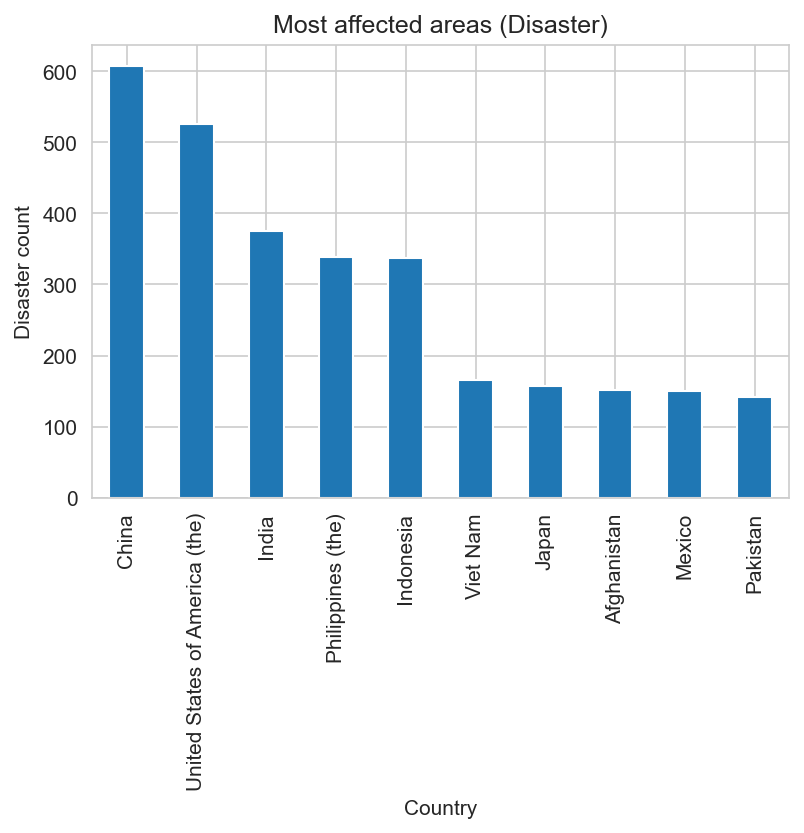

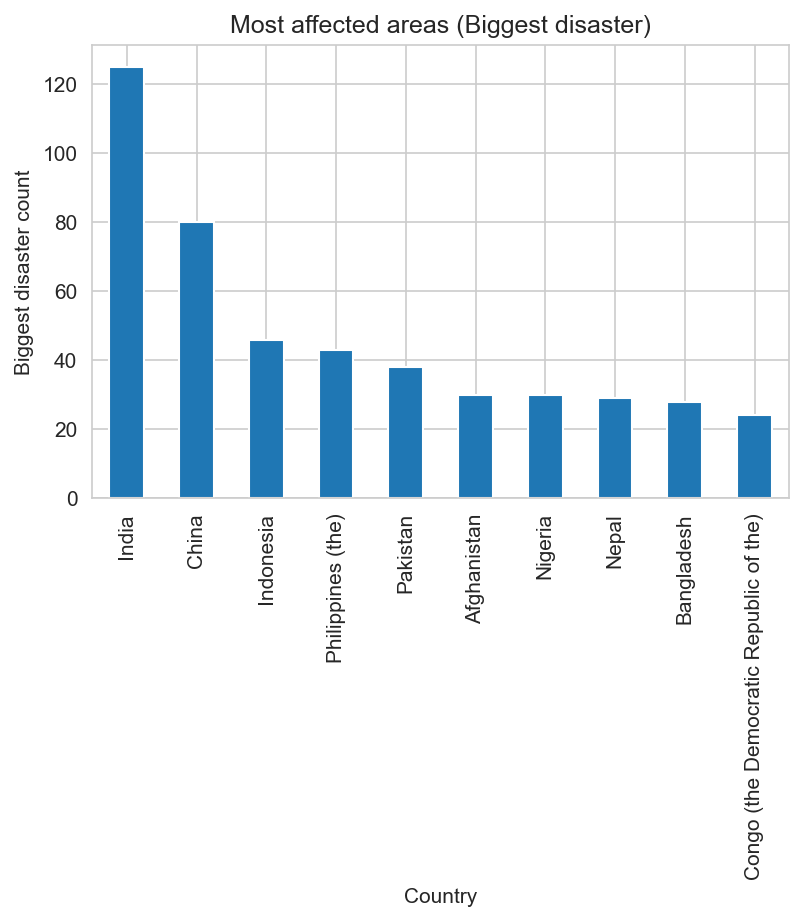

In [12]:
def bar_plot_pandas_series(series, ylabel, title):
    series.plot.bar(ylabel=ylabel, title=title)
    plt.show()

title = "Most affected areas"
for dataset, name in [(disasters, "Disaster"), (biggest_disasters, "Biggest disaster")]:
    series = dataset.groupby(by="Country").count().sort_values(by=["Dis No"], ascending=False)[:10]["Dis No"]
    bar_plot_pandas_series(series, f"{name} count", f"{title} ({name})")

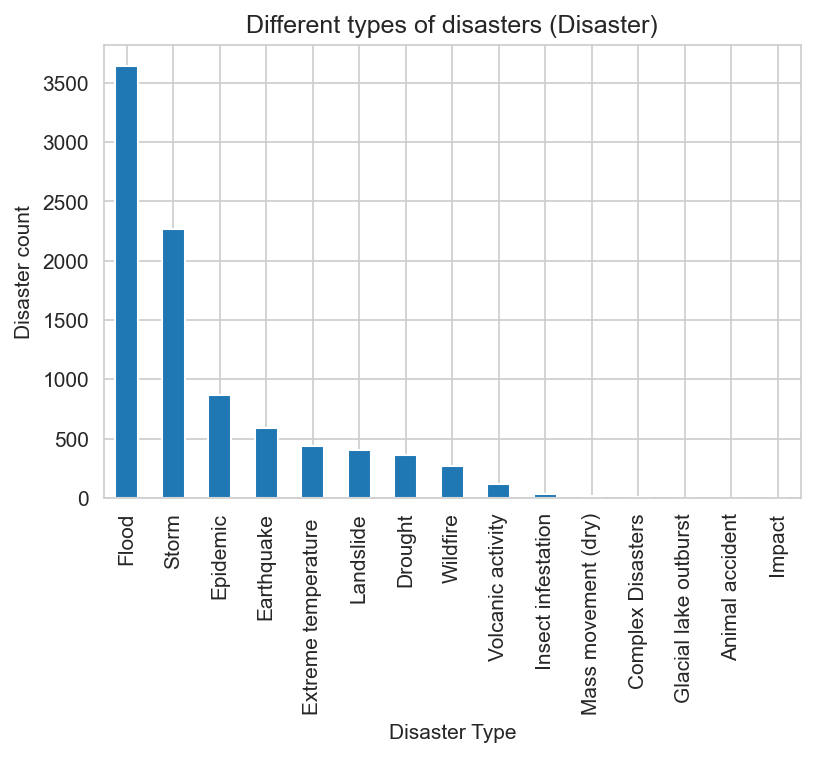

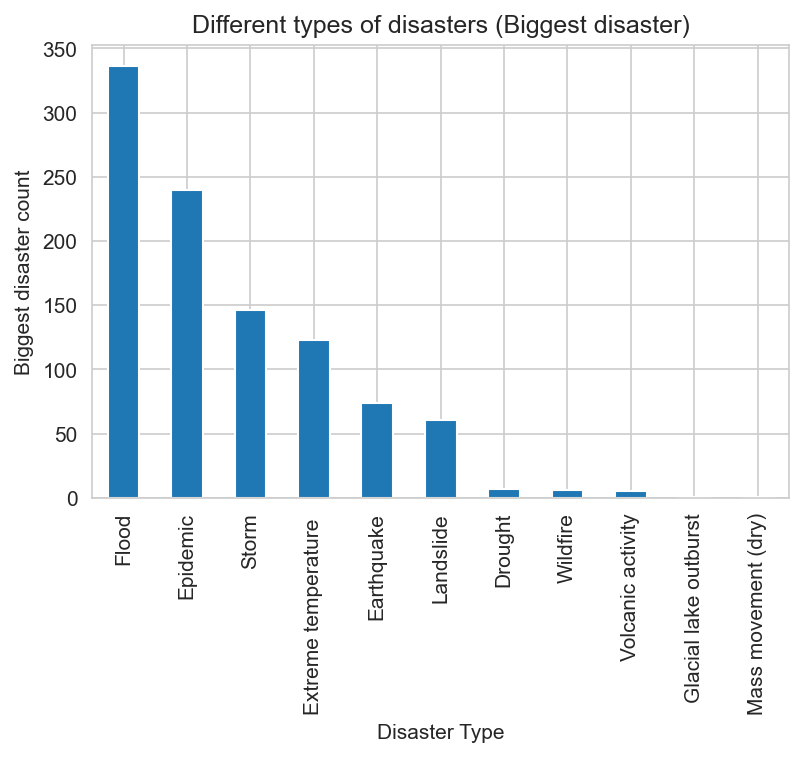

In [13]:
title = "Different types of disasters"
for dataset, name in [(disasters, "Disaster"), (biggest_disasters, "Biggest disaster")]:
    series = dataset.groupby(by="Disaster Type").count().sort_values(by=["Dis No"], ascending=False)["Dis No"]
    bar_plot_pandas_series(series, f"{name} count", f"{title} ({name})")

Text(0.5, 1.0, 'Floods: connection between magnitude and casualities')

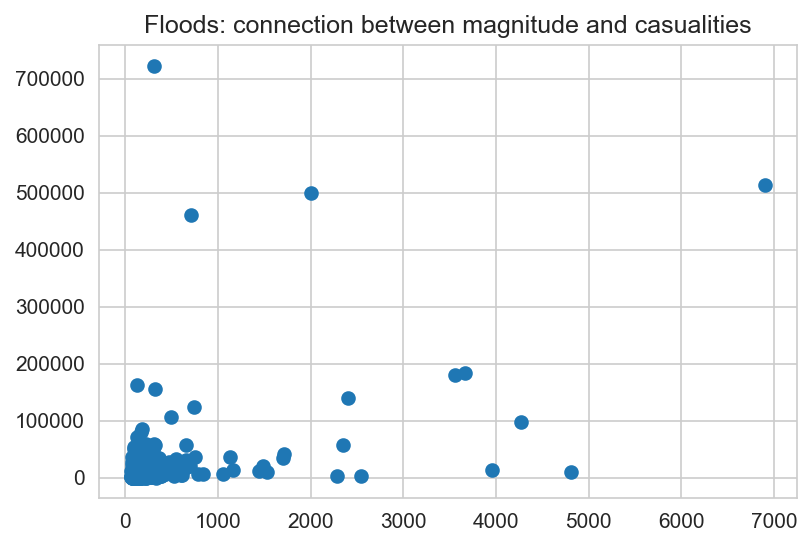

In [14]:
floods = biggest_disasters[biggest_disasters["Disaster Type"]=='Epidemic'][["Total Deaths", "Total Affected"]]
plt.scatter(floods["Total Deaths"],floods["Total Affected"])

plt.title("Floods: connection between magnitude and casualties")
plt.show()